<a href="https://colab.research.google.com/github/18K41A0288/NNDL/blob/main/Assignment%2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from math import *
import random
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
load_data = pd.read_excel("/content/drive/MyDrive/Load Data in kW.xlsx",header = None)
load_data.describe()

,0
count,2184.000000
mean,6393.230623
std,17139.102597
min,3377.919600
25%,5258.767680
50%,5935.910400
75%,6738.692400
max,805444.430400


In [ ]:
from scipy import stats
z = np.abs(stats.zscore(load_data.iloc[:,0]))
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


{'boxes': [<matplotlib.lines.Line2D at 0x7fdec0ab6710>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdec0cc2a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdec0b4c310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdec0b500d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdec05caf90>,
  <matplotlib.lines.Line2D at 0x7fdec058e850>]}

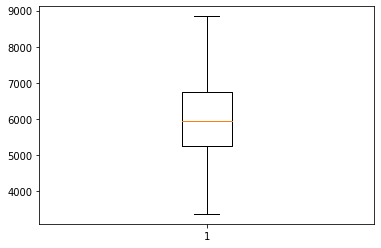

In [ ]:
load_data.iloc[929,0] = load_data.iloc[928,0]
plt.boxplot(load_data.iloc[:,0])

[0.39787738 0.29380046 0.27645431 ... 0.24629825 0.32438447 0.65165045]


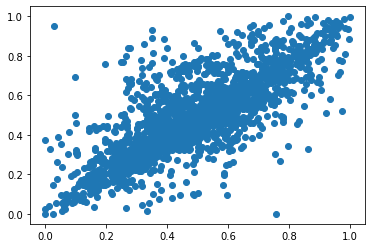

In [ ]:
data = minmax_scale(load_data.iloc[:,0])
print(data)

x = []
y = []
for i in range(1,len(data)-24):
  temp = [data[i],data[i+23]]
  x.append(temp)
  y.append(data[i+24])


x = np.array(x)
y = np.array(y)
plt.scatter(x[:,[1]],y)

In [ ]:
print(x[[1][0]][0])
print(x[[1][0]][1])
print(y[[1]][0])

print(x)
print(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

def gradientm0(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)*x0

def gradientm1(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)*x1

def gradientc(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)

def error(x,y,m0,m1,c):
  number_of_samples = len(x)
  sum = 0
  for i in range(number_of_samples):
    sum = sum + pow((y[[i]][0] - m0*x[[i][0]][0] - m1*x[[i][0]][1] - c), 2)
  error_value = 1*0.5*(1/number_of_samples)*sum
  return error_value

learning_rate = 0.01
epochs = 1000

m0 = 1
m1 = 1
c = 1

Gm0 = 0
Gm1 = 0
Gc = 0
gama = 0.9
e = pow(10,-6)
number_of_samples = len(x_train)
error_list = []

for i in range(epochs):
    for j in range(number_of_samples):
        gradient_m0 = gradientm0(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)
        gradient_m1 = gradientm1(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)
        gradient_c = gradientc(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)

        Gm0 = gama*Gm0 + (1-gama)*gradient_m0**2
        Gm1 = gama*Gm1 + (1-gama)*gradient_m1**2
        Gc = gama*Gc + (1-gama)*gradient_c**2

        learning_rate_m0 = learning_rate/sqrt(Gm0+e)
        learning_rate_m1 = learning_rate/sqrt(Gm1+e)
        learning_rate_c = learning_rate/sqrt(Gc+e)
        
        deltam0 = -1*learning_rate_m0*gradient_m0
        deltam1 = -1*learning_rate_m1*gradient_m1
        deltac = -1*learning_rate_c*gradient_c
        
        m0 = m0 + deltam0
        m1 = m1 + deltam1
        c = c + deltac
    err = error(x,y,m0,m1,c)
    print(err)
    error_list.append(err)

0.2764543094348234
0.25579869333257255
0.24450087016062294
[[0.29380046 0.28430002]
 [0.27645431 0.25579869]
 [0.31023366 0.24450087]
 ...
 [0.68414596 0.21779692]
 [0.51467861 0.24629825]
 [0.41730621 0.32438447]]
[0.25579869 0.24450087 0.23996462 ... 0.24629825 0.32438447 0.65165045]
1727
1727
432
432
0.008195198853209736
0.007951167051450327
0.007925804957970094
0.007979927006202167
0.007930126077536348
0.008014410577078112
0.00794024890967673
0.007982097792717502
0.00820235179885373
0.00807545701790441
0.008097886255790852
0.008010597815716154
0.008033710957503945
0.008006751934132689
0.008094287010999325
0.008154895305349647
0.008053672251975516
0.008122511513552758
0.008363731852531963
0.008107355360219915
0.008096410489496662
0.00830667052960964
0.008160239795091331
0.008136153829059085
0.008139694654184116
0.008166977228436017
0.008144156299820082
0.008155974368652693
0.00815430092760942
0.00816200288799432
0.008147215712693395
0.008329648376018642
0.0081982378883464
0.00818771

0.7696587651456466 0.018090192518933082 0.10729720243844398


Text(0.5, 1.0, 'error graph in case of SGD with RMS')

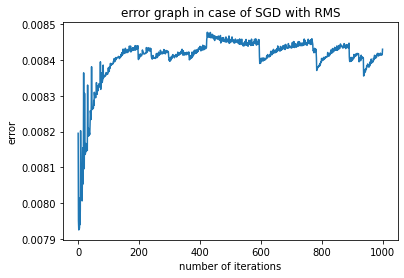

In [ ]:
x1 = range(epochs)
y1 = error_list
print(m0,m1,c)

plt.plot(x1,y1)
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("error graph in case of SGD with RMS")

In [ ]:
train_error = error(x_train,y_train,m0,m1,c)
test_error = error(x_test,y_test,m0,m1,c)

print("train error : ",train_error)
print("test error : ",test_error)

input_load0 = float(input("enter yesterday load at this time : "))
input_load1 = float(input("enter load at previous hour : "))

max_value = 8841.669480
min_value = 3377.919600

input_load0 = (input_load0 - min_value)/(max_value-min_value)
input_load1 = (input_load1 - min_value)/(max_value-min_value)
output_load = input_load0*m0 + input_load1*m0 + c

output_load = output_load*(max_value-min_value)+min_value

print("predicted load for this hour is : ",output_load)

train error :  0.00813846110407163
test error :  0.009593300433235278
enter yesterday load at this time : 3000
enter load at previous hour : 3500
predicted load for this hour is :  3767.2557941995337
